<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Zyrek/systemRekomendacyjny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import random
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#SKLEP
df = pd.read_csv("GroceryStoreDataSet.csv", header=None)
df.head(10)

In [ ]:
transactions_list = [row.split(',') for row in df[0]]
transaction_e = TransactionEncoder()
transaction_e_ary = transaction_e.fit(transactions_list).transform(transactions_list)
transaction_e_ary

In [ ]:
transaction_e_ary.astype("int")

In [ ]:
df_data = pd.DataFrame(transaction_e_ary, columns = transaction_e.columns_)
df_data

In [ ]:
support = apriori(df_data, min_support = 0.15, use_colnames = True).sort_values(by = 'support', ascending = False)
support

In [ ]:
confidence = association_rules(support, metric="confidence", min_threshold=0.05).sort_values(by = 'confidence', ascending = False)
confidence

In [ ]:
confidence_zhang = association_rules(support, metric='zhangs_metric', min_threshold=0.15).sort_values(by='zhangs_metric', ascending=False)
confidence_zhang

In [34]:
#FILMY
movies = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv")
movies.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [8]:
ratings = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv")
ratings.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [9]:
df = pd.merge(ratings, movies, on='movieId')
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [12]:
suma_ocen = df['rating'].count()
print ("Suma wszystkich ocen ", suma_ocen)

Suma wszystkich ocen  100836


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
suma_filmow = df['title'].nunique()
print ("Liczba wszystkich filmów", suma_filmow)

Liczba wszystkich filmów 9719


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
suma_users = df['userId'].nunique()
print ("Liczba wszystkich użytkowników", suma_users)

Liczba wszystkich użytkowników 610


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
srednia_ocen = suma_ocen / suma_users
print ("Średnia liczba ocen", srednia_ocen)

Średnia liczba ocen 165.30491803278687


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
srednia_ocen_film = suma_ocen / suma_filmow
print ("Średnia ilość ocen na film", srednia_ocen_film)

Średnia ilość ocen na film 10.375141475460438


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
rating_distribution = df['rating'].value_counts().sort_index()
print('Rozkład ocen', rating_distribution)

Rozkład ocen rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
titles_dict = dict(zip(movies['movieId'], movies['title']))
titles_dict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{1: 'Toy Story (1995)',
 2: 'Jumanji (1995)',
 3: 'Grumpier Old Men (1995)',
 4: 'Waiting to Exhale (1995)',
 5: 'Father of the Bride Part II (1995)',
 6: 'Heat (1995)',
 7: 'Sabrina (1995)',
 8: 'Tom and Huck (1995)',
 9: 'Sudden Death (1995)',
 10: 'GoldenEye (1995)',
 11: 'American President, The (1995)',
 12: 'Dracula: Dead and Loving It (1995)',
 13: 'Balto (1995)',
 14: 'Nixon (1995)',
 15: 'Cutthroat Island (1995)',
 16: 'Casino (1995)',
 17: 'Sense and Sensibility (1995)',
 18: 'Four Rooms (1995)',
 19: 'Ace Ventura: When Nature Calls (1995)',
 20: 'Money Train (1995)',
 21: 'Get Shorty (1995)',
 22: 'Copycat (1995)',
 23: 'Assassins (1995)',
 24: 'Powder (1995)',
 25: 'Leaving Las Vegas (1995)',
 26: 'Othello (1995)',
 27: 'Now and Then (1995)',
 28: 'Persuasion (1995)',
 29: 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 31: 'Dangerous Minds (1995)',
 32: 'Twelve Monkeys (a.k.a. 12 Monkeys) (199

In [26]:
M = df['userId'].nunique()
N = df['movieId'].nunique()
user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
user_index = [user_mapper[i] for i in df['userId']]
item_index = [movie_mapper[i] for i in df['movieId']]
X = csr_matrix((df["rating"], (user_index, item_index)), shape=(M,N))
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
sparsity_p = round(sparsity*100,2)
print(f"Matrix sparsity: {sparsity_p}%")
n_ratings_per_user = X.getnnz(axis=1)

Matrix sparsity: 1.7%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    X = X.T
    neighbour_ids = []
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)

    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

similar_movies = find_similar_movies(movie_id=1,X=X,movie_mapper=movie_mapper,movie_inv_mapper=movie_inv_mapper, k=10)
similar_movies

movie_names = df.loc[df['movieId'].isin(similar_movies), 'title'].tolist()
set(movie_names)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Forrest Gump (1994)',
 'Groundhog Day (1993)',
 'Independence Day (a.k.a. ID4) (1996)',
 'Jurassic Park (1993)',
 'Lion King, The (1994)',
 'Mission: Impossible (1996)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Toy Story 2 (1999)'}

In [28]:
filmy_dzieci = df[df['genres'].str.contains('Children')]['movieId'].nunique()
print(f"Liczba filmów dla dzieci: {filmy_dzieci}")

Liczba filmów dla dzieci: 664


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


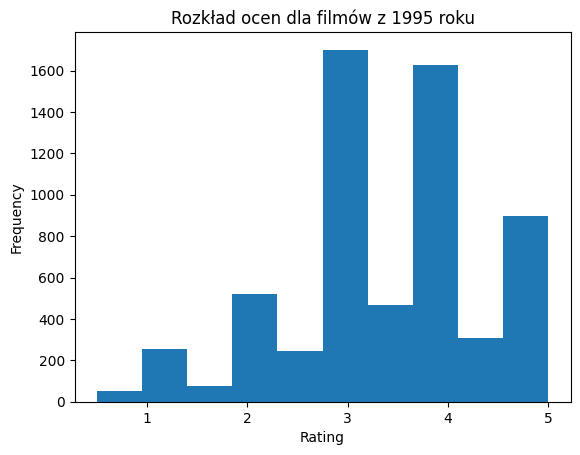

In [30]:
df['year'] = df['title'].str.extract(r'\((\d{4})\)', expand=False)
oceny_1995 = df[df['year'] == '1995']
oceny_1995['rating'].plot(kind='hist', bins=10, title='Rozkład ocen dla filmów z 1995 roku')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [32]:
filmy_akcja = df[df['genres'].str.contains('Action')]

avg_rating_akcja = filmy_akcja['rating'].mean()
print(f"Średnia ocena dla filmu akcji: {avg_rating_akcja}")

top_3_filmy_akcja = filmy_akcja.groupby('title')['rating'].mean().sort_values(ascending=False).head(3)
print("Top 3 najlepiej oceniane filmy:")
print(top_3_filmy_akcja)

Średnia ocena dla filmu akcji: 3.447984331646809
Top 3 najlepiej oceniane filmy:
title
Knock Off (1998)                                                      5.0
On the Other Side of the Tracks (De l'autre côté du périph) (2012)    5.0
Sonatine (Sonachine) (1993)                                           5.0
Name: rating, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
!pip install surprise

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357235 sha256=cd3fd781184485f0d9886acb107e85b52da876bb024ea3c98a0fe4cba9245f77
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [35]:
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import GridSearchCV, cross_validate

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

param_grid_svd = {'n_factors': [15, 30], 'n_epochs': [20, 30], 'lr_all': [0.005, 0.010]}
gs_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse', 'mae'], cv=5)
gs_svd.fit(data)

random_k = random.randint(5, 40)
print(f"Randomly selected number of neighbors: {random_k}")

param_grid_knn = {'k': [random_k], 'sim_options': {'name': ['msd', 'cosine'], 'user_based': [False]}}
gs_knn = GridSearchCV(KNNBasic, param_grid_knn, measures=['rmse', 'mae'], cv=5)
gs_knn.fit(data)

best_svd = gs_svd.best_estimator['rmse']
best_knn = gs_knn.best_estimator['rmse']

cv_svd = cross_validate(best_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cv_knn = cross_validate(best_knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("SVD results:", cv_svd)
print("kNN results:", cv_knn)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Randomly selected number of neighbors: 26
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8599  0.8662  0.8612  0.8704  0.8731  0.8662  0.0051  
MAE (test